----
title: "Laboratory 02"
format:
    html: default
    pdf:
        margin: 0.5in
        papersize: a4
        toc: true
        number-sections: true
----

# Context and questions 
A researcher wondered whether a fish or cat made a better pet. He found some people who had either fish or cats as pets and measured their life satisfaction and how much they like animals. The data are saved in `pets.sav`.

# Objectives
1. Describe the frequency distribution of pet.
2. Draw boxplots for life satisfaction by pet. Compare the life satisfaction of those who
have fish and those who have cats.
3. Draw a histogram of life satisfaction. Describe your findings.
4. Obtain the mean, median, standard deviation, range, and inter-quartile range of life
satisfaction. Which indices for central tendency and dispersion will you choose to
describe this variable? Why?
5. (Extra credit) Draw histograms of life satisfaction by pet. In SPSS, you can follow
the procedure below.
    ```
    (1) ⟨ Graphs⟩ ⟶ ⟨ Chart Builder⟩ ⟶ ⟨ OK ⟩
    (2) Double-click on ⟨ Simple Histogram ⟩ under ⟨ Histogram ⟩
    (3) Check ⟨ Columns panel variable ⟩ under ⟨ Groups/Point ID ⟩
    (4) Drag “Type of pet” to ⟨Panel? ⟩
    (5) Drag “Life satisfaction” to ⟨ X-Axis? ⟩
    (6) ⟨ OK ⟩
    Describe your findings.
    ```

As always, I load the library required and the dataset. Since this time we don't need to dig too much into the SPSS-reserved metadata of this file, I directly load the data through `pandas`'s `pd.read_spss()` function and did a quick summary on the existing dataset:  

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Read sav files
pets = pd.read_spss('./datasets/pets.sav')

In [12]:
# A quick summary on its shape, columns, and data distribution: 

def summarize(df_pets):
    shape = df_pets.shape
    columns = df_pets.columns
    description = df_pets.describe()
    print(df_pets.head(5))
    print("Number of rows and columns of the loaded dataset: ")
    print("Rows: " + str(shape[0]) + 
          "\nColumns: " + str(shape[1]))
    print("Columns of the loaded dataset: ")
    print(columns)
    print("Description of the loaded dataset:")
    print(description)

summarize(pets)

    pet  animal  life_satisfaction
0  Fish    69.0               47.0
1  Fish    25.0                6.0
2  Fish    31.0               47.0
3  Fish    29.0               33.0
4  Fish    12.0               13.0
Number of rows and columns of the loaded dataset: 
Rows: 20
Columns: 3
Columns of the loaded dataset: 
Index(['pet', 'animal', 'life_satisfaction'], dtype='object')
Description of the loaded dataset:
          animal  life_satisfaction
count  20.000000          20.000000
mean   36.200000          46.950000
std    15.449749          17.506315
min    12.000000           6.000000
25%    25.000000          40.750000
50%    35.000000          47.500000
75%    45.250000          60.250000
max    69.000000          72.000000


# Q1: The frequency distribution of `pet`

**Answer**

| Pet  | Frequency |
|------|-----------|
| Cat  | 8         |
| Fish | 12        |



**Solution**

In [10]:
def freq_pet('')
pets['pet'].value_counts()

pet
Fish    12
Cat      8
Name: count, dtype: int64

# Q2: Boxplot on fish and cat

<Axes: xlabel='pet', ylabel='life_satisfaction'>

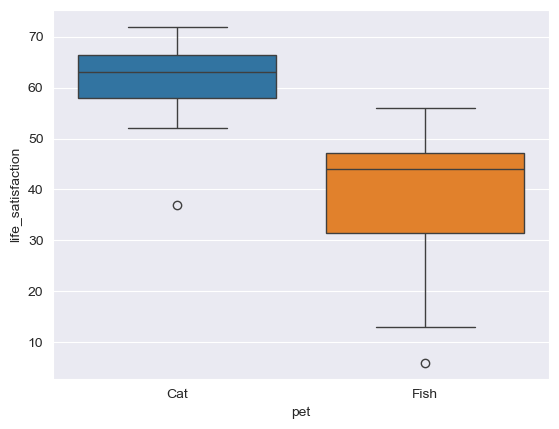

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(pets, x='pet', y='life_satisfaction', hue='pet')

# Q3+Q5: Histogram of `life_satisfaction` (+ by pet)

<Axes: xlabel='life_satisfaction', ylabel='Count'>

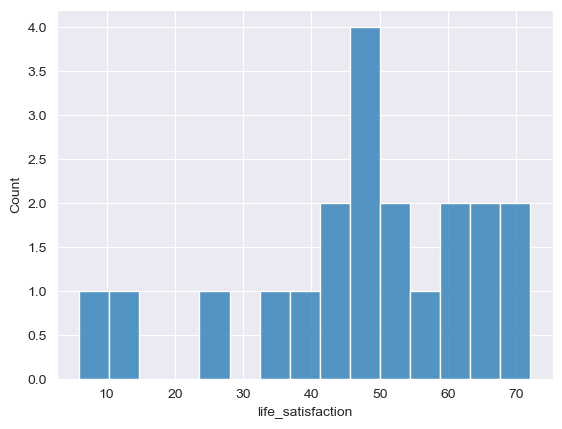

In [23]:
sns.histplot(data=pets, x='life_satisfaction', bins=15)

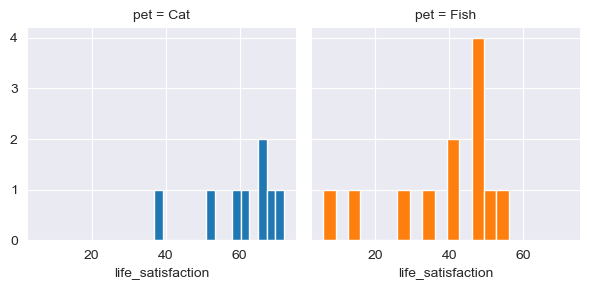

In [74]:
g = sns.FacetGrid(data=pets, col='pet', hue='pet')
g = g.map(plt.hist, 'life_satisfaction', bins=15)
plt.show()

# Q4: Measurements to describe variables

I believe this 
mean, median, standard deviation, range, and inter-quartile range

In [66]:
# Mean: 
print(pets['life_satisfaction'].mean())
# Median: 
print(pets['life_satisfaction'].median())
# Standard Deviation: 
print(pets['life_satisfaction'].std())
# Interquartile range: 
print(pets['life_satisfaction'].quantile([0.25, 0.75]))
print(60.25-40.75)

46.95
47.5
17.50631465019348
0.25    40.75
0.75    60.25
Name: life_satisfaction, dtype: float64
19.5


In [70]:
from scipy import stats

stats.iqr(pets['life_satisfaction'], rng=(0,100))

66.0

# Final thoughts: a FACULTY OF edu**CAT**ion

![Alley cat in the E33 gate](./alley-cats-e33.webp)

It's quite often to see a family of alley cats if you pass the gate in front of our faculty, they sometimes meow to the passengers, but most of the cases they remain silent and never let you touch them. 


Although applying the TNR (which means Trap-Neuter-Return) for those alley cats seems the best option to all of the characters in this story. Neither our government nor NGO did this for dozens of reason. We all love cats for sure. But constrain and trade-off is everywhere in the real life. 

So, the only thing I can say is, 

Kitty, live long and prosper 🖖.